<a href="https://colab.research.google.com/github/Kovibordy/ML-2.0/blob/main/Lab_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [71]:
# преобразовать категориальные признаки в category
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for column in categorical_columns:
    if column in df.columns:
        df[column] = df[column].astype('category')
        print(f"Колонка '{column}' преобразована в category")
        print(f"  Категории: {df[column].cat.categories.tolist()}")
df.info()

Колонка 'Gender' преобразована в category
  Категории: ['Female', 'Male']
Колонка 'Occupation' преобразована в category
  Категории: ['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse', 'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer', 'Teacher']
Колонка 'BMI Category' преобразована в category
  Категории: ['Normal', 'Normal Weight', 'Obese', 'Overweight']
Колонка 'Blood Pressure' преобразована в category
  Категории: ['115/75', '115/78', '117/76', '118/75', '118/76', '119/77', '120/80', '121/79', '122/80', '125/80', '125/82', '126/83', '128/84', '128/85', '129/84', '130/85', '130/86', '131/86', '132/87', '135/88', '135/90', '139/91', '140/90', '140/95', '142/92']
Колонка 'Sleep Disorder' преобразована в category
  Категории: ['Insomnia', 'Sleep Apnea']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   ---------

In [66]:
# 1. Удаление Person ID
print(f"Удаляем 'Person ID' из датасета. Было колонок: {len(df.columns)}")
df = df.drop(columns=['Person ID'])
print(f"Колонок после удаления 'Person ID': {len(df.columns)}")

# 2. Обработка пропусков в 'Sleep Disorder'
# Проверяем уникальные значения и пропуски
print("\nУникальные значения 'Sleep Disorder' до обработки:")
print(df['Sleep Disorder'].value_counts(dropna=False))

Удаляем 'Person ID' из датасета. Было колонок: 13
Колонок после удаления 'Person ID': 12

Уникальные значения 'Sleep Disorder' до обработки:
Sleep Disorder
Unknown        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [61]:
df['Sleep Disorder'] = df['Sleep Disorder'].cat.add_categories(['Unknown'])
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Unknown')

print("\nУникальные значения 'Sleep Disorder' после заполнения NaN как 'Unknown':")
print(df['Sleep Disorder'].value_counts(dropna=False))


Уникальные значения 'Sleep Disorder' после заполнения NaN как 'Unknown':
Sleep Disorder
Unknown        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


Сделали из NaN unknown для наглядности

In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

#y = df['Sleep Duration']
#X = df.drop('Sleep Duration', axis=1)

#print(f"Целевая переменная: Sleep Duration")
#print(f"Размеры: X {X.shape}, y {y.shape}")

Целевая переменная: Sleep Duration
Размеры: X (374, 12), y (374,)


In [62]:
y = df['Sleep Duration']
X = df.drop('Sleep Duration', axis=1)

print(f"\nРазмеры после удаления 'Person ID' и обработки 'Sleep Disorder': X {X.shape}, y {y.shape}")


Размеры после удаления 'Person ID' и обработки 'Sleep Disorder': X (374, 12), y (374,)


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [72]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("Пропуски в данных:")
for col, count, percent in zip(missing_data.index, missing_data.values, missing_percent.values):
    if count > 0:
        print(f"  {col}: {count} пропусков ({percent:.1f}%)")

Пропуски в данных:
  Sleep Disorder: 219 пропусков (58.6%)


In [73]:
print("Распределение целевой переменной 'Sleep Duration':")
print(f"Медиана: {df['Sleep Duration'].median():.2f} часов")
print(f"Среднее: {df['Sleep Duration'].mean():.2f} часов")
print(f"Стандартное отклонение: {df['Sleep Duration'].std():.2f} часов")
print(f"Минимум: {df['Sleep Duration'].min():.2f} часов")
print(f"Максимум: {df['Sleep Duration'].max():.2f} часов")

Распределение целевой переменной 'Sleep Duration':
Медиана: 7.20 часов
Среднее: 7.13 часов
Стандартное отклонение: 0.80 часов
Минимум: 5.80 часов
Максимум: 8.50 часов


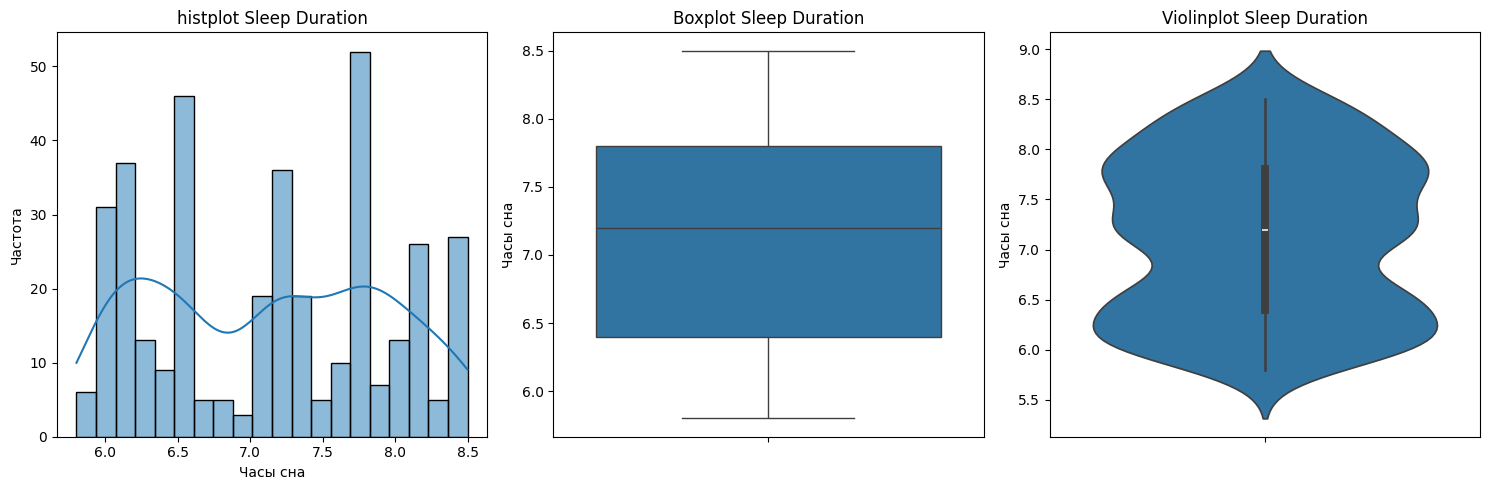

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Sleep Duration'], kde=True, bins=20)
plt.title('histplot Sleep Duration')
plt.xlabel('Часы сна')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Sleep Duration'])
plt.title('Boxplot Sleep Duration')
plt.ylabel('Часы сна')

plt.subplot(1, 3, 3)
sns.violinplot(y=df['Sleep Duration'])
plt.title('Violinplot Sleep Duration')
plt.ylabel('Часы сна')

plt.tight_layout()
plt.show()

Исходя из данных, видим, что пиковые значения на 6.5 и примерно 8 часов сна

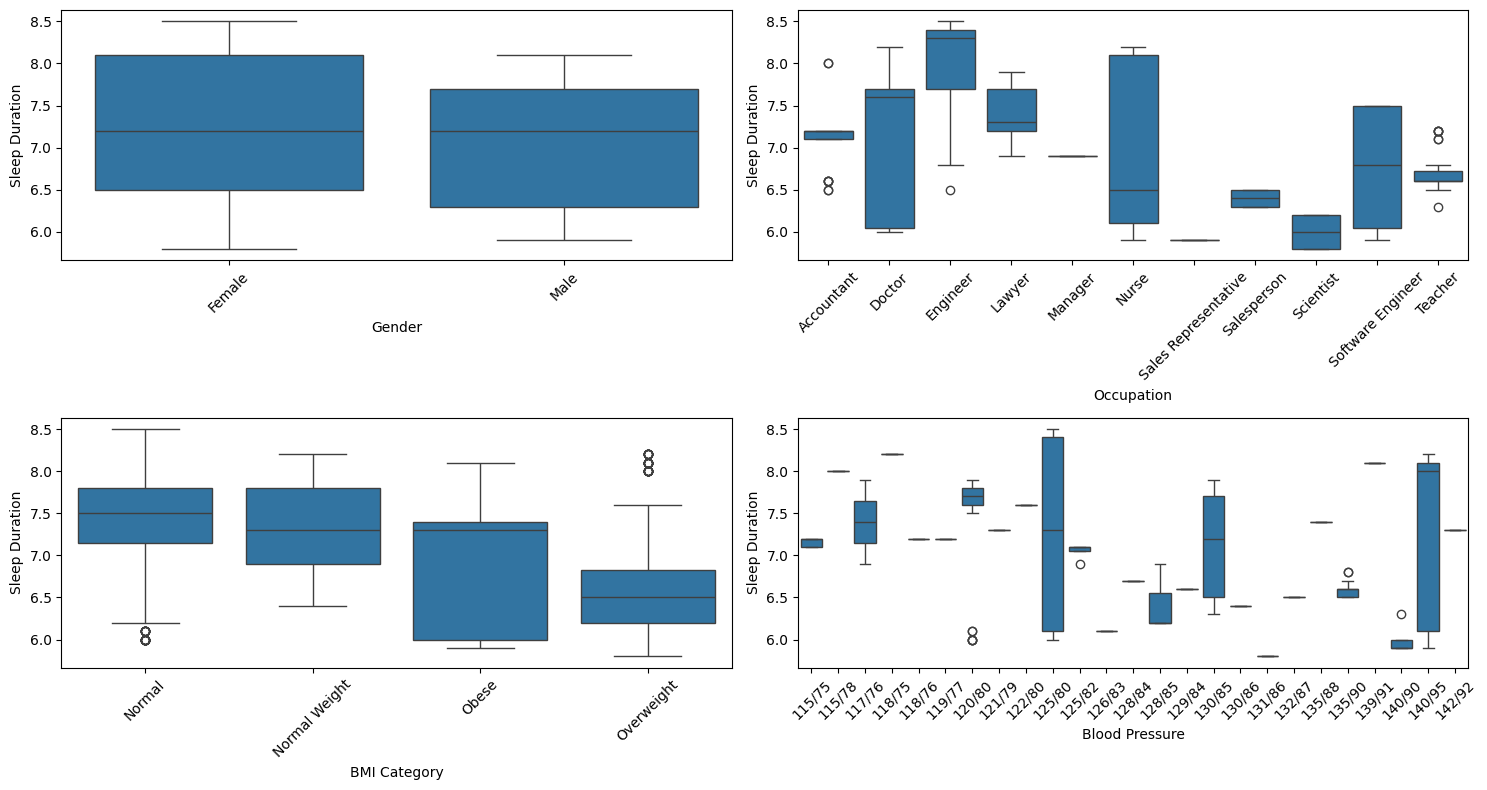

In [75]:
# Y и категориальные признаки
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for i, feature in enumerate(categorical_features):
    sns.boxplot(data=df, x=feature, y=y, ax=axes[i//2, i%2])
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

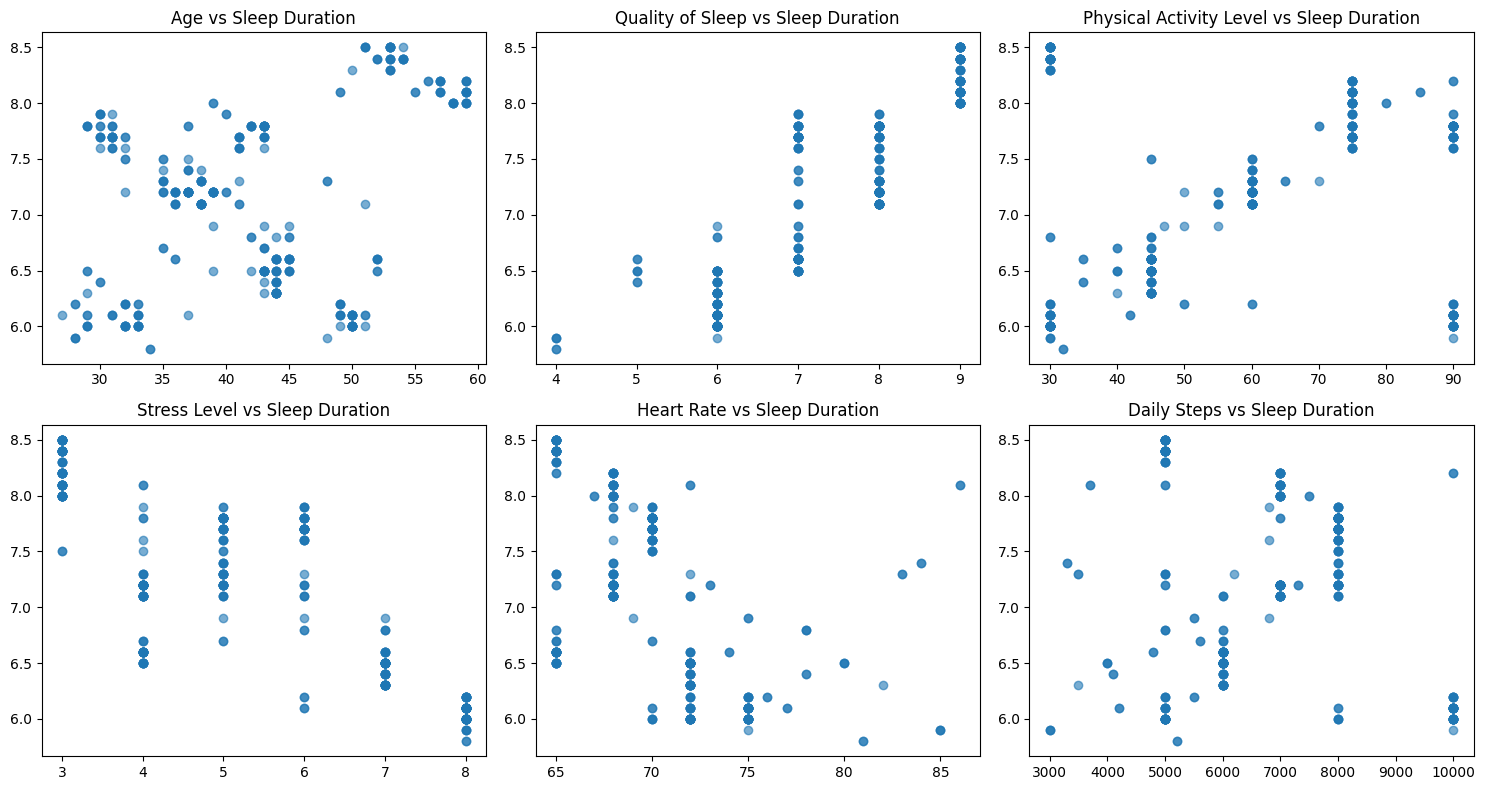

In [76]:
# Y и числовые признаки
numeric_features = ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(numeric_features):
    axes[i//3, i%3].scatter(df[feature], y, alpha=0.6)
    axes[i//3, i%3].set_title(f'{feature} vs Sleep Duration')
plt.tight_layout()
plt.show()

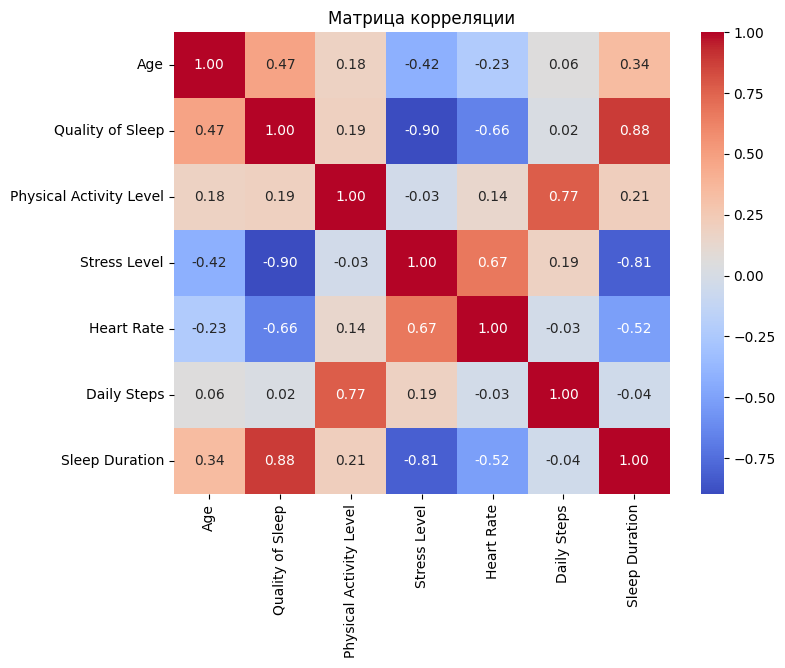

Корреляция с Sleep Duration:
Sleep Duration             1.000000
Quality of Sleep           0.883213
Age                        0.344709
Physical Activity Level    0.212360
Daily Steps               -0.039533
Heart Rate                -0.516455
Stress Level              -0.811023
Name: Sleep Duration, dtype: float64


In [77]:
# Матрица корреляции
numeric_df = df[numeric_features + ['Sleep Duration']]
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

print("Корреляция с Sleep Duration:")
print(correlation_matrix['Sleep Duration'].sort_values(ascending=False))

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [78]:
# Удаление Person ID
print(f"Удаляем 'Person ID' из датасета. Было колонок: {len(df.columns)}")
df = df.drop(columns=['Person ID'])
print(f"Колонок после удаления 'Person ID': {len(df.columns)}")

# Обработка пропусков в 'Sleep Disorder'
# Проверяем уникальные значения и пропуски
print("\nУникальные значения 'Sleep Disorder' до обработки:")
print(df['Sleep Disorder'].value_counts(dropna=False))

Удаляем 'Person ID' из датасета. Было колонок: 13
Колонок после удаления 'Person ID': 12

Уникальные значения 'Sleep Disorder' до обработки:
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [79]:
# Определяем числовые и категориальные признаки после очистки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

print(f"Числовые признаки: {numeric_features}")
print(f"Категориальные признаки: {categorical_features}")

# Создаем ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features) # handle_unknown='ignore' на случай новых категорий на тесте
    ]
)

Числовые признаки: ['Person ID', 'Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Категориальные признаки: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']



--- Модель 1: Все признаки на всей выборке ---
Модель 1 - Все признаки (кроме Person ID) на всей выборке:
MAE: 0.0702
MSE: 0.0101
RMSE: 0.1003
R²: 0.9841


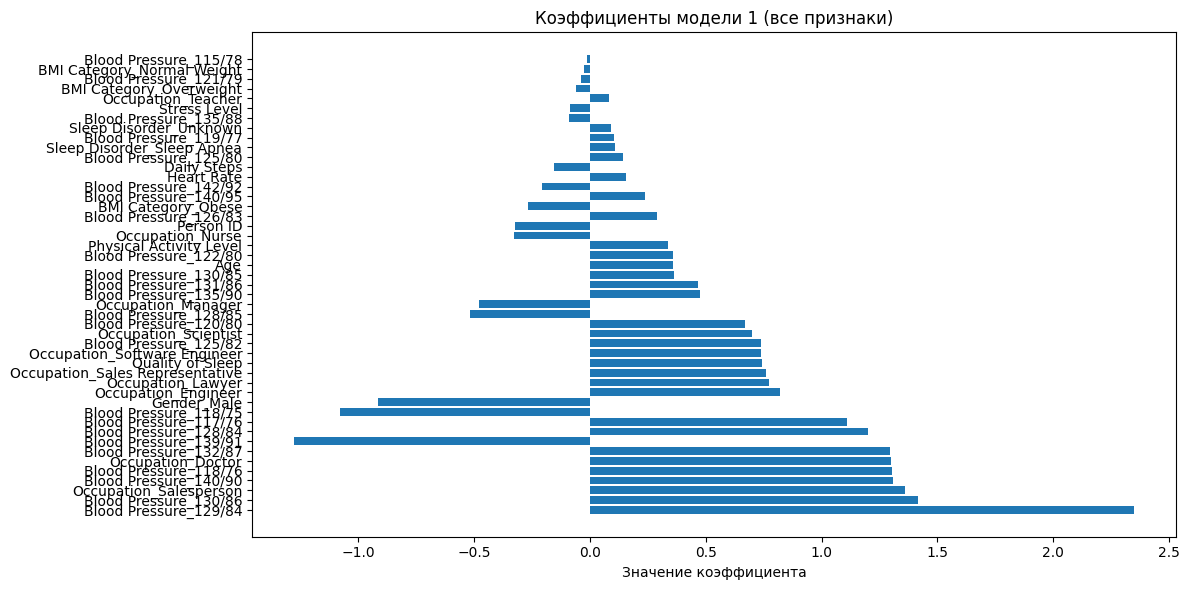


Топ-5 коэффициентов модели 1 (по абсолютному значению):
                   feature  coefficient
34   Blood Pressure_129/84     2.347570
36   Blood Pressure_130/86     1.416723
14  Occupation_Salesperson     1.359305
42   Blood Pressure_140/90     1.307639
24   Blood Pressure_118/76     1.304023


In [80]:
#МОДЕЛЬ 1
print("\n--- Модель 1: Все признаки на всей выборке ---")

# Создаем пайплайн
model1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучаем пайплайн
model1_pipeline.fit(X, y)

# Предсказываем
y_pred1 = model1_pipeline.predict(X)

# Метрики
mae1 = mean_absolute_error(y, y_pred1)
mse1 = mean_squared_error(y, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y, y_pred1)

print("Модель 1 - Все признаки (кроме Person ID) на всей выборке:")
print(f"MAE: {mae1:.4f}")
print(f"MSE: {mse1:.4f}")
print(f"RMSE: {rmse1:.4f}")
print(f"R²: {r2_1:.4f}")

# Визуализация коэффициентов (теперь нужно получить их из пайплайна)
# Получаем имена признаков после преобразования
scaler_names = numeric_features
encoder = model1_pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_names = encoder.get_feature_names_out(categorical_features)
all_feature_names = list(scaler_names) + list(encoded_cat_names)

# Получаем коэффициенты
coefficients = model1_pipeline.named_steps['regressor'].coef_

coef_df1 = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': coefficients
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df1)), coef_df1['coefficient'])
plt.yticks(range(len(coef_df1)), coef_df1['feature'])
plt.title('Коэффициенты модели 1 (все признаки)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("\nТоп-5 коэффициентов модели 1 (по абсолютному значению):")
print(coef_df1.head(5))


--- Модель 2: Все признаки (кроме Person ID) с train/test split ---
Модель 2 - Все признаки с train/test split:

Обучающая выборка:
MAE: 0.0630
MSE: 0.0080
RMSE: 0.0897
R²: 0.9870

Тестовая выборка:
MAE: 0.0949
MSE: 0.0231
RMSE: 0.1521
R²: 0.9653


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


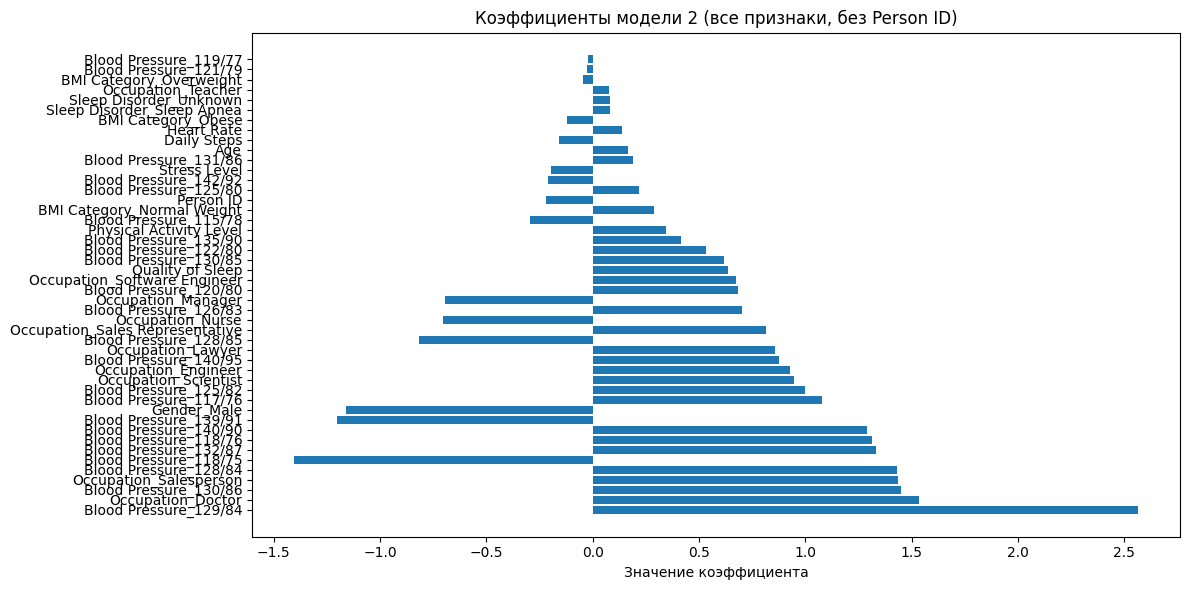


Топ-5 коэффициентов модели 2 (по абсолютному значению):
                   feature  coefficient
34   Blood Pressure_129/84     2.563245
8        Occupation_Doctor     1.533338
36   Blood Pressure_130/86     1.451511
14  Occupation_Salesperson     1.433108
32   Blood Pressure_128/84     1.429085


In [81]:
# --- МОДЕЛЬ 2 (исправленная) ---
print("\n--- Модель 2: Все признаки (кроме Person ID) с train/test split ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем пайплайн на обучающей выборке
model2_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model2_pipeline.fit(X_train, y_train)

# Предсказания
y_train_pred2 = model2_pipeline.predict(X_train)
y_test_pred2 = model2_pipeline.predict(X_test)

# Метрики
metrics_train = {
    'MAE': mean_absolute_error(y_train, y_train_pred2),
    'MSE': mean_squared_error(y_train, y_train_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred2)),
    'R²': r2_score(y_train, y_train_pred2)
}
metrics_test = {
    'MAE': mean_absolute_error(y_test, y_test_pred2),
    'MSE': mean_squared_error(y_test, y_test_pred2),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred2)),
    'R²': r2_score(y_test, y_test_pred2)
}

print("Модель 2 - Все признаки с train/test split:")
print("\nОбучающая выборка:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")
print("\nТестовая выборка:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Визуализация коэффициентов (та же логика, что и для модели 1)
# Получаем имена признаков после преобразования
scaler_names = numeric_features
encoder = model2_pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_names = encoder.get_feature_names_out(categorical_features)
all_feature_names = list(scaler_names) + list(encoded_cat_names)

coefficients = model2_pipeline.named_steps['regressor'].coef_

coef_df2 = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': coefficients
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df2)), coef_df2['coefficient'])
plt.yticks(range(len(coef_df2)), coef_df2['feature'])
plt.title('Коэффициенты модели 2 (все признаки, без Person ID)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("\nТоп-5 коэффициентов модели 2 (по абсолютному значению):")
print(coef_df2.head(5))

Отобранные лучшие признаки:
['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
Модель 3 - Лучшие признаки на всей выборке:
MAE: 0.2968
MSE: 0.1247
RMSE: 0.3532
R²: 0.8025


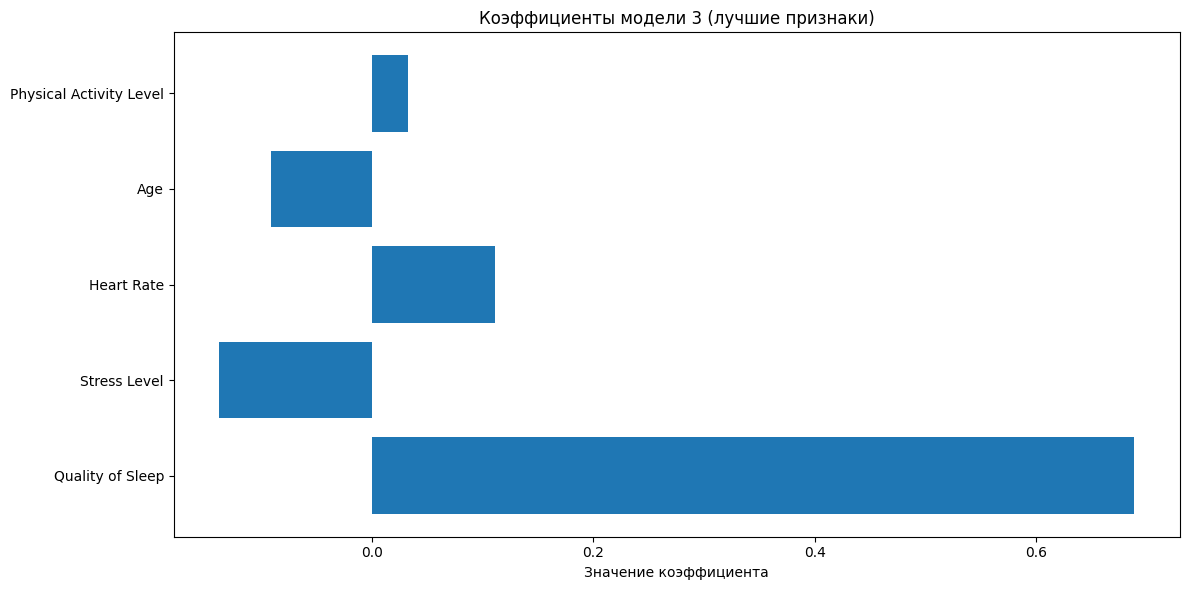

Коэффициенты модели 3:
                   feature  coefficient
1         Quality of Sleep     0.688347
3             Stress Level    -0.137482
4               Heart Rate     0.110999
0                      Age    -0.091004
2  Physical Activity Level     0.032353


In [82]:
# Модель 3
# 1. Выбираем лучшие признаки (k=5) из всех обработанных признаков
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_selected_full = selector.fit_transform(X_processed, y_model)

# 2. Получаем названия выбранных признаков
selected_mask = selector.get_support()
best_features_names = X_processed.columns[selected_mask]
print("Отобранные лучшие признаки:")
print(best_features_names.tolist())

# 3. Создаем датафрейм только с отобранными признаками
X_best_full = X_processed[best_features_names]

# 4. Обучаем модель линейной регрессии на всей выборке (X_best_full, y_model)
model3 = LinearRegression()
model3.fit(X_best_full, y_model)

# 5. Делаем предсказания на той же выборке
y_pred3 = model3.predict(X_best_full)

# 6. Вычисляем метрики
mae3 = mean_absolute_error(y_model, y_pred3)
mse3 = mean_squared_error(y_model, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_model, y_pred3)

print("Модель 3 - Лучшие признаки на всей выборке:")
print(f"MAE: {mae3:.4f}")
print(f"MSE: {mse3:.4f}")
print(f"RMSE: {rmse3:.4f}")
print(f"R²: {r2_3:.4f}")

# 7. Визуализация коэффициентов модели
coef_df3 = pd.DataFrame({
    'feature': best_features_names,
    'coefficient': model3.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(coef_df3)), coef_df3['coefficient'])
plt.yticks(range(len(coef_df3)), coef_df3['feature'])
plt.title('Коэффициенты модели 3 (лучшие признаки)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("Коэффициенты модели 3:")
print(coef_df3)


Лучшие признаки (модель 4): ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
Размеры после отбора: X_train (299, 5), X_test (75, 5)

Модель 4 - Лучшие признаки с train/test split:

ОБУЧАЮЩАЯ ВЫБОРКА:
MAE: 0.2973
MSE: 0.1244
RMSE: 0.3527
R²: 0.7993

ТЕСТОВАЯ ВЫБОРКА:
MAE: 0.2988
MSE: 0.1269
RMSE: 0.3562
R²: 0.8094


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


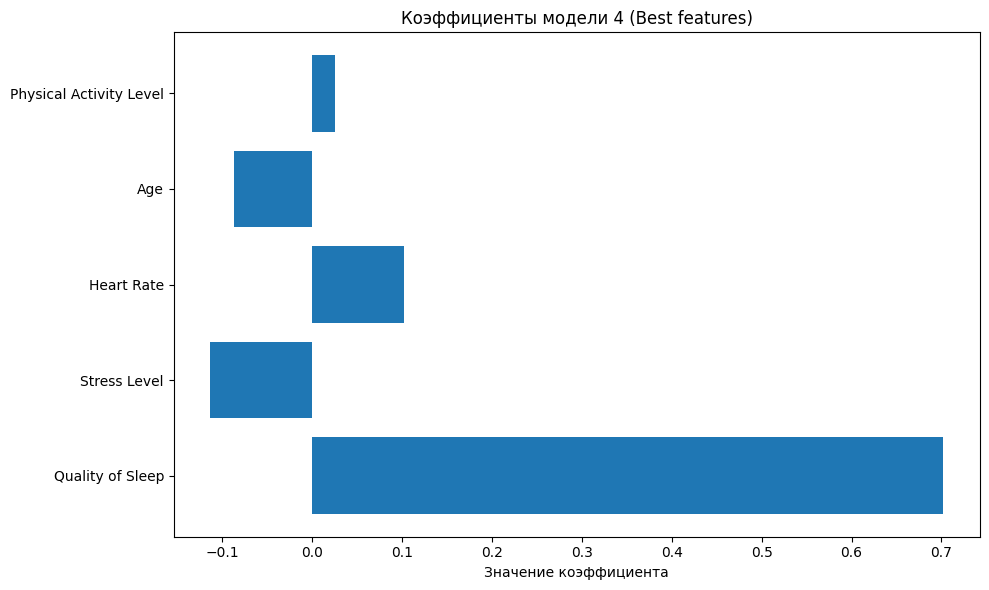


Коэффициенты модели 4:
                   feature  coefficient
1         Quality of Sleep     0.702070
3             Stress Level    -0.113121
4               Heart Rate     0.101699
0                      Age    -0.087124
2  Physical Activity Level     0.025897


In [83]:
# Модель 4
# 1. Разделяем ОБРАБОТАННЫЕ данные на train и test (X_processed, y_model)
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_processed, y_model, test_size=0.2, random_state=42
)

# 2. Применяем отбор признаков ТОЛЬКО к обучающей выборке и получаем маску
selector4 = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector4.fit_transform(X_train_full, y_train)
best_features_mask = selector4.get_support()

# 3. Получаем имена выбранных признаков из обучающей выборки
best_features_names_4 = X_train_full.columns[best_features_mask]
print("\nЛучшие признаки (модель 4):", best_features_names_4.tolist())

# 4. Применяем ТУ ЖЕ маску отбора к тестовой выборке
X_test_selected = X_test_full[best_features_names_4]

print(f"Размеры после отбора: X_train {X_train_selected.shape}, X_test {X_test_selected.shape}")

# 5. Обучаем модель на отобранных признаках обучающей выборки
model4 = LinearRegression()
model4.fit(X_train_selected, y_train)

# 6. Предсказываем на обучающей и тестовой выборках
y_train_pred4 = model4.predict(X_train_selected)
y_test_pred4 = model4.predict(X_test_selected)

# 7. Вычисляем метрики для обеих выборок
mae_train4 = mean_absolute_error(y_train, y_train_pred4)
mse_train4 = mean_squared_error(y_train, y_train_pred4)
rmse_train4 = np.sqrt(mse_train4)
r2_train4 = r2_score(y_train, y_train_pred4)

mae_test4 = mean_absolute_error(y_test, y_test_pred4)
mse_test4 = mean_squared_error(y_test, y_test_pred4)
rmse_test4 = np.sqrt(mse_test4)
r2_test4 = r2_score(y_test, y_test_pred4)

print("\nМодель 4 - Лучшие признаки с train/test split:")
print("\nОБУЧАЮЩАЯ ВЫБОРКА:")
print(f"MAE: {mae_train4:.4f}")
print(f"MSE: {mse_train4:.4f}")
print(f"RMSE: {rmse_train4:.4f}")
print(f"R²: {r2_train4:.4f}")
print("\nТЕСТОВАЯ ВЫБОРКА:")
print(f"MAE: {mae_test4:.4f}")
print(f"MSE: {mse_test4:.4f}")
print(f"RMSE: {rmse_test4:.4f}")
print(f"R²: {r2_test4:.4f}")

# 8. Визуализация коэффициентов модели 4
# Коэффициенты находятся в том же порядке, что и best_features_names_4
coef_df4 = pd.DataFrame({
    'feature': best_features_names_4,
    'coefficient': model4.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(coef_df4)), coef_df4['coefficient'])
plt.yticks(range(len(coef_df4)), coef_df4['feature'])
plt.title('Коэффициенты модели 4 (Best features)')
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

print("\nКоэффициенты модели 4:")
print(coef_df4)